In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import technical_trading as tt
import pyfolio as pf

/Applications/anaconda/lib/python3.5/site-packages/pandas/io/data.py:33: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)
/Applications/anaconda/lib/python3.5/site-packages/sklearn/utils/fixes.py:64: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if 'order' in inspect.getargspec(np.copy)[0]:


In [2]:
data = pd.read_csv('/Users/jianboxue/Documents/Research_Projects/data/hs300.csv', 
                       index_col='date', parse_dates=True)
data.vol = data.vol.astype(float)

In [41]:
output = pd.DataFrame()
output['open'] = data['open']
output['high'] = data['high']
output['low'] = data['low']
output['close'] = data['close']
output['price'] = data['close']


## add returns series
for j in [1, 2, 5, 10] :
    output['ret' + str(j)] = (output['close']/output['close'].shift(j) - 1)
        
## add EMA 
for j in [2, 5, 10, 20, 50, 100] :
    output['ema' + str(j)] = talib.EMA(np.array(output['price']), j)

In [42]:
import talib
import numpy as np
output['ema'] = talib.EMA(np.array(output['price']), 2)

In [46]:
import talib as ta
def kdj(HLC, n = 14, m = 3, l = 3, s = 3) :
    C = HLC['close'] # Close price
    L = HLC['low']
    H = HLC['high']

    L_n = pd.rolling_min(L, n)
    H_n = pd.rolling_max(H, n)
    RSV_n = (C - L_n)/(H_n - L_n) * 100
    K = ta.EMA(np.array(RSV_n), m)
    
    D = ta.EMA(np.array(K), l)
    J = s*D - (s-1)*K
    return K, D, J#, RSV_n, signal

In [67]:
import matplotlib.pyplot as plt
import pandas as pd
import technical_trading as tt
import pyfolio as pf
import numpy as np
import talib as ta

from deap import gp
from timeit import itertools
#import Strategy_Evalution_Tools.turtle_evalution as te


#import matplotlib.pyplot as py
def read_data() :
    data = pd.read_csv('/Users/jianboxue/Documents/Research_Projects/data/hs300.csv', 
                       index_col='date', parse_dates=True)
    data.vol = data.vol.astype(float)
    start = pd.Timestamp('2005-09-01')
    end = pd.Timestamp('2012-03-15')
    data = data[start:end]
    return data


def process_data(data):
    output = pd.DataFrame()
    output['open'] = data['open']
    output['high'] = data['high']
    output['low'] = data['low']
    output['close'] = data['close']
    output['price'] = data['close']
    
    
    ## add returns series
    for j in [1, 2, 5, 10] :
        output['ret' + str(j)] = (output['close']/output['close'].shift(j) - 1)
        
    ## add EMA 
    for j in [2, 5, 10, 20, 50, 100] :
        output['ema' + str(j)] = ta.EMA(np.array(output['price']), j)

    ## add lag price
    for i in range(1, 15) :
        output['price' + str(i)] = data['close'].shift(i)
    
    ### KDJ
    K,D,J = kdj(data)
    output['K'] = K
    output['D'] = D
    output['J'] = J
  
    return output
       

def kdj(HLC, n = 14, m = 3, l = 3, s = 3) :
    C = HLC['close'] # Close price
    L = HLC['low']
    H = HLC['high']

    L_n = pd.rolling_min(L, n)
    H_n = pd.rolling_max(H, n)
    RSV_n = (C - L_n)/(H_n - L_n) * 100
    K = ta.EMA(np.array(RSV_n), m)
    
    D = ta.EMA(np.array(K), l)
    J = s*D - (s-1)*K
    return K, D, J#, RSV_n, signal


data = read_data()
meta_data = process_data(data)
nr_cols = meta_data.columns.size

pset = gp.PrimitiveSetTyped("MAIN", itertools.repeat(float, nr_cols),"IN")

In [75]:
from deap import *
import operators

data = read_data()
meta_data = process_data(data)
meta_data = meta_data.dropna()

nr_cols = meta_data.columns.size

# boolean operator
pset = gp.PrimitiveSetTyped("MAIN", itertools.repeat(float, nr_cols), "IN")
pset.addPrimitive(operator.and_, [bool, bool], bool)
pset.addPrimitive(operator.or_, [bool, bool], bool)
pset.addPrimitive(operator.xor, [bool, bool], bool)
pset.addPrimitive(operator.not_, [bool], bool)

# loglic operator
pset.addPrimitive(operator.gt, [float, float], bool)
pset.addPrimitive(operator.lt, [float, float], bool)

# terminals
pset.addEphemeralConstant("rsi_0_100", lambda: np.random.random_sample()*100, float)
creator.create("Individual", gp.PrimitiveTree)

toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)

expr = toolbox.individual()
nodes, edges, labels = gp.graph(expr)

### Graphviz Section ###
import pygraphviz as pgv

g = pgv.AGraph()
g.add_nodes_from(nodes)
g.add_edges_from(edges)
g.layout(prog="dot")

for i in nodes:
    n = g.get_node(i)
    n.attr["label"] = labels[i]

g.draw("tree.pdf")

ImportError: cannot import name 'operator'

{1: 1236, 2: 1500, 3: 1473}


/Applications/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:1186: FutureWarning: scalar indexers for index type Int64Index should be integers and not floating point
  self._convert_scalar_indexer(key, axis)
/Applications/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:81: FutureWarning: scalar indexers for index type Int64Index should be integers and not floating point
  return self.obj[label]


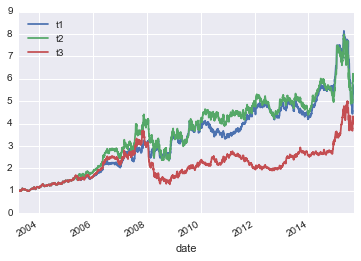

In [7]:
import numpy
from scipy import stats

from sklearn import linear_model

import matplotlib.pyplot as plt
import pandas as pd
import pyfolio as pf

%matplotlib inline


def get_patterns(n, ret) :
    signals = pd.DataFrame()
    scores = [];
    for i in range(n) :
        signals[i] = (ret.shift(n-i-1) > 0) * 1
        if (i == 0) :
            scores = signals[i];
        else :
            scores = scores + signals[i] * pow(2, i);
    return scores;

def get_patterns1(n, ret) :
    signals = pd.DataFrame();
    scores = [];
    for i in range(0, n) :
        signals[i] = 2*(ret.shift(n - i-1) > 0.0075)
        signals[i] = signals[i] + 1*((ret.shift(n - i - 1) > -0.0075) & (signals[i] != 2))
        if (i == 0) :
            scores = signals[i];
        else :
            scores = scores + signals[i] * pow(3, i);
    return scores;

### function: get patterns, and calculate the historical insample returns, sharpe ratios and 
### other risk measures for each pattern. 
def pattern_characters(n, ret, annualized_factor=365) :
    pattern = get_patterns(n, ret)
    ret_pattern = pd.DataFrame(pattern.shift(1), columns=['pattern']).join(ret)
    ret_pattern_grouped = ret_pattern.groupby('pattern')

    nr_group = ret_pattern_grouped.count().shape[0]
    counts = {}
    probs = {}
    profit_factor = {}
    sharpes = {}
    for i in range(nr_group) :
        ret_test = ret_pattern_grouped.get_group(i).ix[:, 1]
        counts[i] = len(ret_test)
        probs[i] = sum(ret_test > 0) / counts[i]
        profit_factor[i] = sum(ret_test[ret_test > 0]) / sum(-ret_test[ret_test < 0])
        sharpes[i] = numpy.mean(ret_test) / numpy.std(ret_test) * numpy.sqrt(annualized_factor)
    prob_list = pd.DataFrame(pd.Series(counts, name='count'), index = range(nr_group))
    prob_list = prob_list.join(pd.Series(probs, name='win_rate'))
    prob_list = prob_list.join(pd.Series(profit_factor, name='profit_factor'))
    prob_list = prob_list.join(pd.Series(sharpes, name='sharpes'))
    
    return prob_list

### function: determine the best trading strategy, based on the pattern,and its historical risk measure
def optimize_returns(n, ret, prob_list) :
    n_total = len(ret)
    patterns = get_patterns(n, ret);
    ret_patterns = pd.DataFrame(patterns.shift(1), columns=['patterns']).join(ret)
    
    signal = pd.Series(0, index=ret_patterns.index)
    for i in range(n_total) :
        pattern = ret_patterns['patterns'].ix[i]
        if numpy.isnan(pattern):
            sharpe = 0;
            win_ratio = 0;
        else :
            sharpe = prob_list['sharpes'].ix[pattern]
            win_ratio = prob_list['win_rate'].ix[pattern]
        if ( win_ratio > 0.5) :
            signal[i] = 1
        elif (win_ratio < 0.5) :
            signal[i] = -1
        else:
            signal[i] = 0
    #print(ret_patterns.ix[:, 1])      
    ret_strategy = ret_patterns.ix[:, 1] * pd.Series(signal, index=ret_patterns.index)
    return ret_strategy
 

### function: 3 types of out-of-sample test for the pattern trading
def strategy_oos_test(n, ret, type = 1, n_lookback = 0, n_sliding = 0) :
    n_total = len(ret)
    ret_oos = pd.DataFrame();
    
    ## type = 1: single train set defined by n_lookback, single test set from n_lookback:n_total
    if type == 1 or type == 0:
        ret_train = ret[0:(n_lookback - 1)]
        ret_test = ret[n_lookback::]

        prob_list = pattern_characters(n, ret_train)
        ret_strategy1 = optimize_returns(n, ret_test, prob_list)
        ret_oos['t1'] = ret_strategy1
        #(1+ret_strategy).cumprod().plot()
    ## type 2: sliding insample window, defined by n_lookback and sliding forward. The test set window is defined as n_      
    if type == 2 or type == 0:
        k = n_lookback
        ret_strategy2 = pd.Series()
        while k < n_total-1 :
            ret_train = ret[0:(k - 1)]
            if (k+n_sliding) <= n_total :
                k2 = k + n_sliding - 1
            else :
                k2 = n_total - 1
            ret_test = ret[k:k2]

            ## trading
            prob_list = pattern_characters(n, ret_train)
            ret_strategy2 = ret_strategy2.append(optimize_returns(n, ret_test, prob_list))
            k = k2;
        ret_oos['t2'] = ret_strategy2
        #(1+ret_strategy).cumprod().plot()
    ## type 3: sliding insample window, defined by n_lookback and sliding forward. The test set window is defined as n_      
    if type == 3 or type == 0:
        k = n_lookback
        ret_strategy3 = pd.Series()
        while k < n_total-1 :
            ret_train = ret[(k-n_lookback):(k - 1)]
            if (k+n_sliding) <= n_total :
                k2 = k + n_sliding - 1
            else :
                k2 = n_total - 1
            ret_test = ret[k:k2]

            ## trading
            prob_list = pattern_characters(n, ret_train)
            ret_strategy3 = ret_strategy3.append(optimize_returns(n, ret_test, prob_list))
            k = k2;
        ret_oos['t3'] = ret_strategy3
        #(1+ret_strategy).cumprod().plot()
        
    return ret_oos;



        

### prepare the data
def get_data() :
    data = pd.read_csv('/Users/jianboxue/Documents/Research_Projects/data/index_shanghai.csv', index_col='date', parse_dates=True)
    data = data['19950101'::]
    #data = pd.read_excel('../../data/500ETF_510500_1d_20151028.xlsx', index_col='date', parse_dates=True)
    
    #### Return calculation
    ret_cc = data['close'] / data['close'].shift(1) - 1
    ret_co = data['close'] / data['open'] - 1
    ret_oc = data['open'] / data['close'].shift(1) - 1
    data['ret_cc'] = ret_cc;
    data['ret_co'] = ret_co;
    data['ret_oc'] = ret_oc;
    ret_all = data.ix[:, ('ret_cc', 'ret_co', 'ret_oc')]
    
    ### cleaning
    data = data.dropna()
    return data

# def main(): 
#     
#     return


#if __name__ == "__main__":
data = get_data()

n=4
n_lookback = 2000
n_sliding = 500
ret = data['ret_cc']
ret_oos = strategy_oos_test(n, ret, 0, n_lookback, n_sliding)

#fig = plt.plot((1+ret_oos).cumprod())
#plt.show()
(1+ret_oos).cumprod().plot()

winrate = {}
winrate[1] = sum(ret_oos.t1>0)
winrate[2] = sum(ret_oos.t2 > 0) 
winrate[3] = sum(ret_oos.t3 > 0) 
print(winrate)